<a href="https://colab.research.google.com/github/Rajesh1patil/credit-risk-model-by-using-python/blob/main/Credit_Risk_model_Campusx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement**

We have customer data we are trying to predit weather lend a loan or not

STEPS



*   Define Problem statement
*   Data Collection


*   Data Correction
*   Check null values

*   Remove Duplicates
*  Null value treatment








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
pd.options.display.max_columns = None
pd.options.display.max_rows = None

NPA

GNPA:(3-5%) Outstanding balance are default(not recoverd if lend rs 100  3 to 5 rs not recovered

NNPA: (0.01-0.06%)- provisioning amount subtracted in simple word this amount has been carried by bank to recover the npa per yearly

In [ ]:
#cibil data set
df=pd.read_excel("/content/drive/MyDrive/Credit Risk model campus x /case_study2.xlsx")

In [ ]:
df.shape

(51336, 62)

In [ ]:
df2=pd.read_excel("/content/drive/MyDrive/Credit Risk model campus x /case_study1.xlsx")

In [ ]:
df2.shape

(51336, 26)

In [ ]:

df2.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [ ]:
merged_data=df.merge(df2,on='PROSPECTID',how='left')

In [ ]:
merged_data.shape

(51336, 87)

In [ ]:
merged_data.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32



PROSPECTID:UID

In [ ]:
merged_data.columns

Index(['PROSPECTID', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'CC_Flag', 'PL_utilization', 'PL_Fla

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

may be graduate and under graduate are same or PG or graduate same,so we not sure so keep as it is,here logically few people do masters so we can add graduate and UG

In [ ]:
# check duplicates
merged_data.duplicated().sum()

0

In [ ]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51336.0,25668.500000,14819.571046,1.0,12834.750,25668.500,38502.25000,51336.000
time_since_recent_payment,51336.0,-8129.961314,27749.328514,-99999.0,46.000,70.000,161.00000,6065.000
time_since_first_deliquency,51336.0,-70020.091320,45823.312757,-99999.0,-99999.000,-99999.000,8.00000,35.000
time_since_recent_deliquency,51336.0,-70022.375838,45819.820741,-99999.0,-99999.000,-99999.000,3.00000,35.000
num_times_delinquent,51336.0,1.573749,4.165012,0.0,0.000,0.000,1.00000,74.000
max_delinquency_level,51336.0,-70003.987085,45847.976100,-99999.0,-99999.000,-99999.000,15.00000,900.000
max_recent_level_of_deliq,51336.0,13.521953,53.336976,0.0,0.000,0.000,10.00000,900.000
num_deliq_6mts,51336.0,0.184977,0.710240,0.0,0.000,0.000,0.00000,12.000
num_deliq_12mts,51336.0,0.480053,1.522210,0.0,0.000,0.000,0.00000,28.000
num_deliq_6_12mts,51336.0,0.295076,1.027471,0.0,0.000,0.000,0.00000,20.000


While working on missing value treatment make sure if column have large amoung of null values it's good to remove that column.and if less null values we can remove null rows from data if you not sure about null value imputation,In credit risk modelling we are predicting very sensitive information we can not be wrong there so if not sure its good to just remove the rows.

In [ ]:
columns_to_remove=[]
for col in merged_data.columns:
  if merged_data.loc[merged_data[col]==-99999].shape[0]>10000:
    columns_to_remove.append(col)

In [ ]:
merged_data.drop(columns_to_remove,axis=1,inplace=True)

In [ ]:
merged_data.shape

(51336, 79)

In [ ]:
#remove -99999 values from data
merged_data=merged_data.replace(-99999,np.nan)
merged_data.dropna(inplace=True)



In [ ]:
merged_data.shape

(42064, 79)

In [ ]:
# merged_data.isnull().mean()

Now we will devide variables in



*   Categorical
*   Numerical

and treat them seperatoly





In [ ]:
#take only object columns
object_cols = merged_data.select_dtypes(include='object').columns
object_cols

#check unique values from char variable
for i in object_cols:
  print(f'{i}:',merged_data[i].unique())

MARITALSTATUS: ['Married' 'Single']
EDUCATION: ['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
GENDER: ['M' 'F']
last_prod_enq2: ['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
first_prod_enq2: ['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']
Approved_Flag: ['P2' 'P1' 'P3' 'P4']



**Hypothesis testing**

in chi square test we simply making a assumption both variables are dependent which is H1 means Alternate hypthesis and on opposite side is H0 which is null hypothesis which is always true untill we prove it wrong

to prove it worng need some evidances so we calculate p value for it, wait this is our evidance meanse H1's evidance what about H0 ,H0 also have evidance which is always assumed and it's significance level which is denoted by (alpha) most of the time it's value is around 0.01,0.05,0.02,or anything lower actually its depend project to project,here significance is threshold which determine weather to reject H0 and It is used to measure the strength of the evidence against the null hypothesis H0.

if p-value<=alpha reject H0

p-value > alpha fail to reject H0

Confidance Interval:This term is 1-alpha ,mease took percentage of risk to reject the H0,It is used to measure the strength of the evidence against the null hypothesis H0


major test

**Chi square**: CAT VS CAT

**T test**: CAT VS NUM (2 categorise) meanse for binary traget variable use t test

**Anova**:CAT VS NUM (>= categorise) fror multiclass classifiaction use this test

In [ ]:
# chi square test
from scipy.stats import chi2_contingency

for i in object_cols:
  chi2,pval,_,_=chi2_contingency(pd.crosstab(merged_data['Approved_Flag'],merged_data[i]))
  print(f'{i}:{pval}')


MARITALSTATUS:3.578180861038862e-233
EDUCATION:2.6942265249737532e-30
GENDER:1.907936100186563e-05
last_prod_enq2:0.0
first_prod_enq2:7.84997610555419e-287
Approved_Flag:0.0


conclusion:

As per the results p value is less than significance level so we are going to reject the null hypothesis these all are strong predictor for target variable we are going to use in our model

In [ ]:
# check numerical statement except procpect_id
numerrical_cols=[]
for i in merged_data.columns:
  if merged_data[i].dtype!='object' and i not in ['PROSPECTID','Approved_Flag']:
    numerrical_cols.append(i)

In [ ]:
len(numerrical_cols)

72

Anova test will perform in this case due to our target variable is multiclass and this is case of

NUM VS CAT(multiclass)

Multicollinearity vs Correlation

Multicollinearity: predictability of each feature by other features

Correlation: is specific to linear relationship between columns


Correlation

Definition: Measures the strength and direction of a linear relationship between two variables.

Range: -1 to 1.

Usage: Indicates how two variables move together.

Multicollinearity

Definition: Occurs when two or more independent variables in a regression model are highly correlated.

Problem: Makes it difficult to estimate the relationship between each independent variable and the dependent variable.

Detection: Variance Inflation Factor (VIF) > 10 indicates high multicollinearity.

Solutions: Remove one of the correlated variables, combine variables, or use regularization techniques like ridge or lasso regression.

Key Difference

Scope: Correlation is between two variables; multicollinearity involves multiple variables in a regression model.

Implications: Correlation is informative; multicollinearity can distort regression analysis.









In [ ]:
#vif calculation sequencial vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data= merged_data[numerrical_cols]
vif=pd.DataFrame()
vif['feature']=vif_data.columns
vif['vif']=[variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]
vif.sort_values(by='vif',ascending=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,vif
65,Home_TL,inf
61,Auto_TL,inf
63,Consumer_TL,inf
67,Secured_TL,inf
68,Unsecured_TL,inf
69,Other_TL,inf
62,CC_TL,inf
35,pct_of_active_TLs_ever,inf
47,Total_TL,inf
66,PL_TL,inf


In [ ]:
# keep variables having vif <8
vif_cols=[]
for i in vif['feature']:
  if vif.loc[vif['feature']==i]['vif'].values[0]<8:
    vif_cols.append(i)

In [ ]:
len(vif_cols)

34

In [ ]:
#chceck anova test on numercal vid_cols
columns_to_be_kept=[]
from scipy.stats import f_oneway
for i in vif_cols:
  a=list(merged_data[i])
  b=list(merged_data['Approved_Flag'])
  group_p1=[value for value,group in zip(a,b) if group=='P1']
  group_p2=[value for value,group in zip(a,b) if group=='P2']
  group_p3=[value for value,group in zip(a,b) if group=='P3']
  group_p4=[value for value,group in zip(a,b) if group=='P4']
  f_stat,p_val=f_oneway(group_p1,group_p2,group_p3,group_p4)
  print(f'{i}:{p_val}')
  if p_val<0.05:
    columns_to_be_kept.append(i)

time_since_recent_payment:8.943912807416738e-81
num_times_delinquent:2.4898875422457523e-77
max_recent_level_of_deliq:6.699932727692095e-81
num_times_60p_dpd:3.3833576401764997e-59
num_std:0.0
num_sub:1.6985545450345584e-22
num_sub_6mts:0.016579119048249723
num_sub_12mts:0.001299484021242129
num_dbt:3.135918708089289e-11
num_dbt_6mts:0.03367240641192199
num_lss:0.009340555562870471
num_lss_6mts:0.5586507342801292
recent_level_of_deliq:1.150955072948535e-97
CC_enq:1.9147060146049822e-206
time_since_recent_enq:0.0
enq_L3m:0.0
AGE:0.0
NETMONTHLYINCOME:5.357633705622659e-26
Time_With_Curr_Empr:6.743539696556877e-271
pct_opened_TLs_L6m_of_L12m:5.371656184864965e-177
pct_currentBal_all_TL:0.6082760667441989
CC_Flag:8.166585968451402e-51
PL_Flag:9.95638250565676e-146
HL_Flag:1.1327801855129724e-237
GL_Flag:5e-324
Credit_Score:0.0
Tot_TL_closed_L6M:1.5601047853590092e-44
pct_tl_open_L6M:0.0
pct_tl_closed_L6M:2.676086811190998e-52
pct_tl_open_L12M:0.0
pct_tl_closed_L12M:4.1384568281483056e-49
T

In [ ]:
len(columns_to_be_kept)

32

In [ ]:
obs_keep=list(object_cols)

In [ ]:
#cols to keep
columns_to_keep=['PROSPECTID']+columns_to_be_kept+obs_keep

In [ ]:
len(columns_to_keep)

39

In [ ]:
final_data=merged_data[columns_to_keep]

In [ ]:
final_data.head()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_times_60p_dpd,num_std,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_lss,recent_level_of_deliq,CC_enq,time_since_recent_enq,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,HL_Flag,GL_Flag,Credit_Score,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Age_Oldest_TL,Age_Newest_TL,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,1,549.0,11,29,0,21,0,0,0,0,0,0,29,0.0,566.0,0.0,48,51000,114,0.0,0,1,1,0,696,0,0.000,0.0,0.00,0.000,0,72.0,18.0,Married,12TH,M,PL,PL,P2
1,2,47.0,0,0,0,0,0,0,0,0,0,0,0,0.0,209.0,0.0,23,19000,50,0.0,0,0,0,0,685,0,0.000,0.0,1.00,0.000,0,7.0,7.0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
2,3,302.0,9,25,0,10,0,0,0,0,0,0,25,0.0,587.0,0.0,40,18,191,0.5,0,0,1,0,693,0,0.125,0.0,0.25,0.000,1,47.0,2.0,Married,SSC,M,ConsumerLoan,others,P2
4,5,583.0,0,0,0,53,0,0,0,0,0,0,0,0.0,3951.0,0.0,48,15000,75,0.0,0,0,0,0,753,0,0.000,0.0,0.00,0.000,0,131.0,32.0,Married,POST-GRADUATE,M,AL,AL,P1
5,6,245.0,14,270,11,5,3,0,1,0,0,0,26,2.0,7.0,4.0,35,0,154,0.0,0,0,1,0,668,0,0.000,0.0,0.00,0.167,0,150.0,17.0,Married,12TH,M,ConsumerLoan,PL,P3


In [ ]:
# now time to encode cat variable
#1.eduction -lable encode due to its orderd data
#2 other -one hot encode

# MARITALSTATUS: ['Married' 'Single']
# EDUCATION: ['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
#  'PROFESSIONAL']
# GENDER: ['M' 'F']
# last_prod_enq2: ['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
# first_prod_enq2: ['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']
# Approved_Flag: ['P2' 'P1' 'P3' 'P4']

final_data.loc[final_data['EDUCATION'].isin(['SSC','OTHERS']),'EDUCATION']=1
final_data.loc[final_data['EDUCATION'].isin(['12TH']),'EDUCATION']=2
final_data.loc[final_data['EDUCATION'].isin(['GRADUATE','UNDER GRADUATE']),'EDUCATION']=3
final_data.loc[final_data['EDUCATION'].isin(['POST-GRADUATE']),'EDUCATION']=4
final_data.loc[final_data['EDUCATION'].isin(['PROFESSIONAL']),'EDUCATION']=5

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.get_dummies(final_data, columns=['MARITALSTATUS','GENDER','last_prod_enq2','first_prod_enq2'],drop_first=True,dtype=int,prefix=['MARITALSTATUS','GENDER','last_prod_enq2','first_prod_enq2'])
df_encoded['Approved_Flag']=LabelEncoder().fit_transform(df_encoded['Approved_Flag'])
df_encoded['EDUCATION']=pd.to_numeric(df_encoded['EDUCATION'])




In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42064 entries, 0 to 51335
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    42064 non-null  int64  
 1   time_since_recent_payment     42064 non-null  float64
 2   num_times_delinquent          42064 non-null  int64  
 3   max_recent_level_of_deliq     42064 non-null  int64  
 4   num_times_60p_dpd             42064 non-null  int64  
 5   num_std                       42064 non-null  int64  
 6   num_sub                       42064 non-null  int64  
 7   num_sub_6mts                  42064 non-null  int64  
 8   num_sub_12mts                 42064 non-null  int64  
 9   num_dbt                       42064 non-null  int64  
 10  num_dbt_6mts                  42064 non-null  int64  
 11  num_lss                       42064 non-null  int64  
 12  recent_level_of_deliq         42064 non-null  int64  
 13  CC_enq

In [ ]:
df_encoded.head()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_times_60p_dpd,num_std,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_lss,recent_level_of_deliq,CC_enq,time_since_recent_enq,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,HL_Flag,GL_Flag,Credit_Score,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Age_Oldest_TL,Age_Newest_TL,EDUCATION,Approved_Flag,MARITALSTATUS_Single,GENDER_M,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,1,549.0,11,29,0,21,0,0,0,0,0,0,29,0.0,566.0,0.0,48,51000,114,0.0,0,1,1,0,696,0,0.000,0.0,0.00,0.000,0,72.0,18.0,2,1,0,1,0,0,0,1,0,0,0,0,1,0
1,2,47.0,0,0,0,0,0,0,0,0,0,0,0,0.0,209.0,0.0,23,19000,50,0.0,0,0,0,0,685,0,0.000,0.0,1.00,0.000,0,7.0,7.0,3,1,1,0,0,1,0,0,0,0,1,0,0,0
2,3,302.0,9,25,0,10,0,0,0,0,0,0,25,0.0,587.0,0.0,40,18,191,0.5,0,0,1,0,693,0,0.125,0.0,0.25,0.000,1,47.0,2.0,1,1,0,1,0,1,0,0,0,0,0,0,0,1
4,5,583.0,0,0,0,53,0,0,0,0,0,0,0,0.0,3951.0,0.0,48,15000,75,0.0,0,0,0,0,753,0,0.000,0.0,0.00,0.000,0,131.0,32.0,4,0,0,1,0,0,0,0,0,0,0,0,0,0
5,6,245.0,14,270,11,5,3,0,1,0,0,0,26,2.0,7.0,4.0,35,0,154,0.0,0,0,1,0,668,0,0.000,0.0,0.00,0.167,0,150.0,17.0,2,2,0,1,0,1,0,0,0,0,0,0,1,0


In [ ]:
df_encoded.Credit_Score.describe()

count    42064.000000
mean       679.326336
std         21.133619
min        469.000000
25%        668.000000
50%        679.000000
75%        690.000000
max        809.000000
Name: Credit_Score, dtype: float64

In [ ]:
df_encoded['Credit_Score'].groupby(df_encoded['Approved_Flag']).mean()

Approved_Flag
0    716.216585
1    682.404958
2    666.818944
3    645.347074
Name: Credit_Score, dtype: float64

In [ ]:
df_encoded.set_index('PROSPECTID',inplace=True)

In [ ]:
#going to fit the in random forest ml model
X=df_encoded.drop('Approved_Flag',axis=1)
y=df_encoded['Approved_Flag']

In [ ]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train,y_train)
y_pred_rf=rf_classifier.predict(X_train)
y_pred_rf=rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score using encoded target values
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import precision_recall_fscore_support
precision,recall,f1_score,support=precision_recall_fscore_support(y_test,y_pred_rf,average=None)

for i,v in enumerate(['p1','p2','p3','p4']):
  print(f"class : {v}")
  print(f"precision: {precision[i]}")
  print(f"recall: {recall[i]}")
  print(f"f1_score: {f1_score[i]}")



Accuracy: 0.9899201217192849
class : p1
precision: 0.9391239792130661
recall: 0.9875097580015613
f1_score: 0.9627092846270929
class : p2
precision: 0.997941083306937
recall: 1.0
f1_score: 0.998969480776853
class : p3
precision: 0.9929757343550447
recall: 0.9452887537993921
f1_score: 0.9685456244160698
class : p4
precision: 1.0
recall: 1.0
f1_score: 1.0


So here we are getting very high accuracy it might suspicious so we will try some techniques to validate the model accuracy

In [ ]:
# cross validation
#here we just devide data in 5 sample and check accuracy for each sample take a mean of all samples

from sklearn.model_selection import cross_val_score
import xgboost as xgb
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Random Forest CV accuracy:", np.mean(rf_scores))

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print("XGBoost CV accuracy:", np.mean(xgb_scores))


Random Forest CV accuracy: 0.9875428026469235
XGBoost CV accuracy: 0.992653861042782


### DATA BALANCE IMBALANCE

If our target values have huge diffrence in there proportion that time we can say our data is imbalance

for eg. i have target values 1,0 so 1 is 95 times and 0 is only 5 times
here its very imbalance dataset

when we have imbalance data its good practice to check f1 score instead of accuracy,accuracy will not give right result in this case

In [ ]:
# check the data imbalance
print(y.value_counts())

Approved_Flag
1    25452
2     6440
3     5264
0     4908
Name: count, dtype: int64


## Confusion matrix

its a simple matrix or cross tab of actual and predicted values where we check how our model correctly model predicting the output

TP:correctly predicted event

TN:correctly predicted non event

FN:incorrect prediction of non event

FP:incorrect  prediction of event

Accuracy=TP+TN/(TP+TN+FP+FN)

Recall: we calculate recall for each category in our model p1,p2,p3,p4

by the name suggested itself remembering something  for example i have two categories in target variable 1,0

i have 100 1 and 60 0's  now if my model predicted 1 70 times them my recall for 1 is 70/100=0.7  means 70% similar for 0 ,how many times model predictted currently suppose it predicted 20 times then recall for 0 is 20/60=33%  
in simple words recall means how many correactly predicted from total from that category.

Precision: this is like recall but slightly change, here we are checking correctly predicted out of total predicted in a class

for example model predicted 70 1(TP) and 20 0(FP) for 1 , so total 1 predicted by model is 90 so my precision is 70/90=77%


F1-score: 2 * P * R/(P+R)

In [ ]:
# check additional matrices ,compare the result

from sklearn.metrics import confusion_matrix, classification_report

# Train model and predict
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


[[1265    5   11    0]
 [   0 6301    0    0]
 [  82    8 1555    0]
 [   0    0    0 1289]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1281
           1       1.00      1.00      1.00      6301
           2       0.99      0.95      0.97      1645
           3       1.00      1.00      1.00      1289

    accuracy                           0.99     10516
   macro avg       0.98      0.98      0.98     10516
weighted avg       0.99      0.99      0.99     10516

[[1236    0   45    0]
 [   0 6301    0    0]
 [  16    0 1629    0]
 [   0    0    0 1289]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1281
           1       1.00      1.00      1.00      6301
           2       0.97      0.99      0.98      1645
           3       1.00      1.00      1.00      1289

    accuracy                           0.99     10516
   macro avg       0.99      0.99      0.99     10516

In [ ]:
#check data disrtibution might data is so simple thats why we are getting high accuracy
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.pairplot(pd.DataFrame(x, columns=df_encoded.columns), hue='Approved_Flag')
# plt.show()

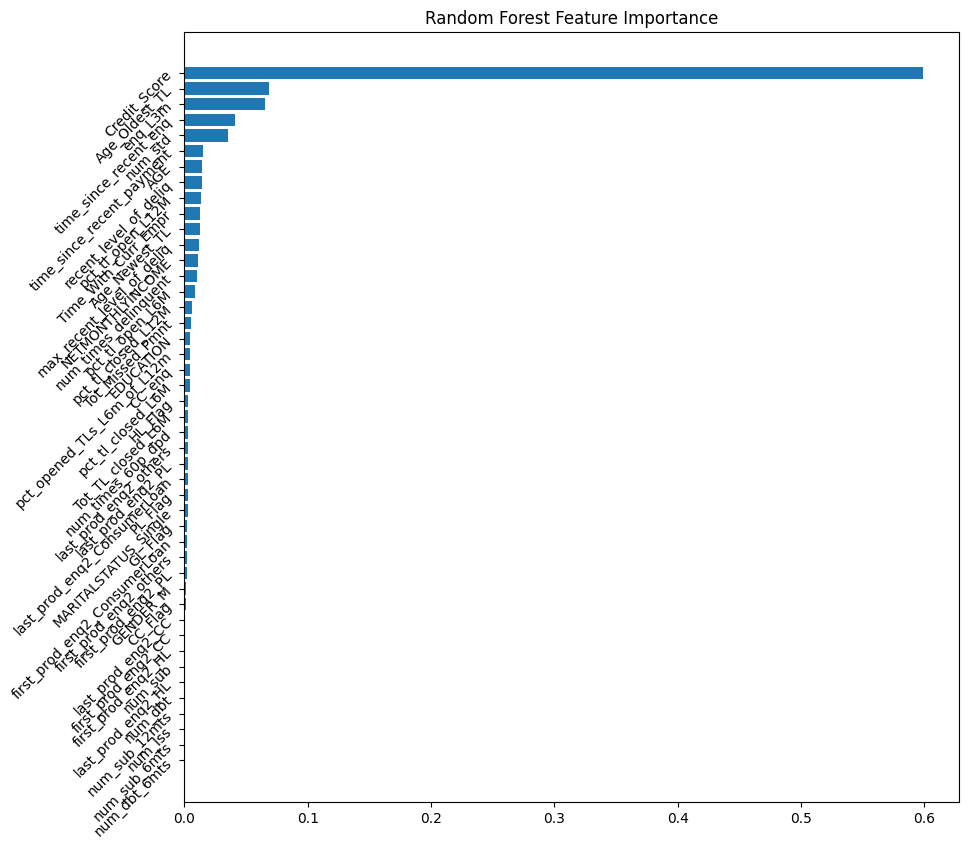

                         Feature  Importance
23                  Credit_Score    0.598660
30                 Age_Oldest_TL    0.068932
14                       enq_L3m    0.065592
13         time_since_recent_enq    0.040831
4                        num_std    0.035287
0      time_since_recent_payment    0.015217
15                           AGE    0.014382
11         recent_level_of_deliq    0.014271
27              pct_tl_open_L12M    0.013034
17           Time_With_Curr_Empr    0.012793
31                 Age_Newest_TL    0.012293
2      max_recent_level_of_deliq    0.011801
16              NETMONTHLYINCOME    0.011041
1           num_times_delinquent    0.009767
25               pct_tl_open_L6M    0.008392
28            pct_tl_closed_L12M    0.005988
29               Tot_Missed_Pmnt    0.005262
32                     EDUCATION    0.004679
18    pct_opened_TLs_L6m_of_L12m    0.004621
12                        CC_enq    0.004620
26             pct_tl_closed_L6M    0.004363
21        

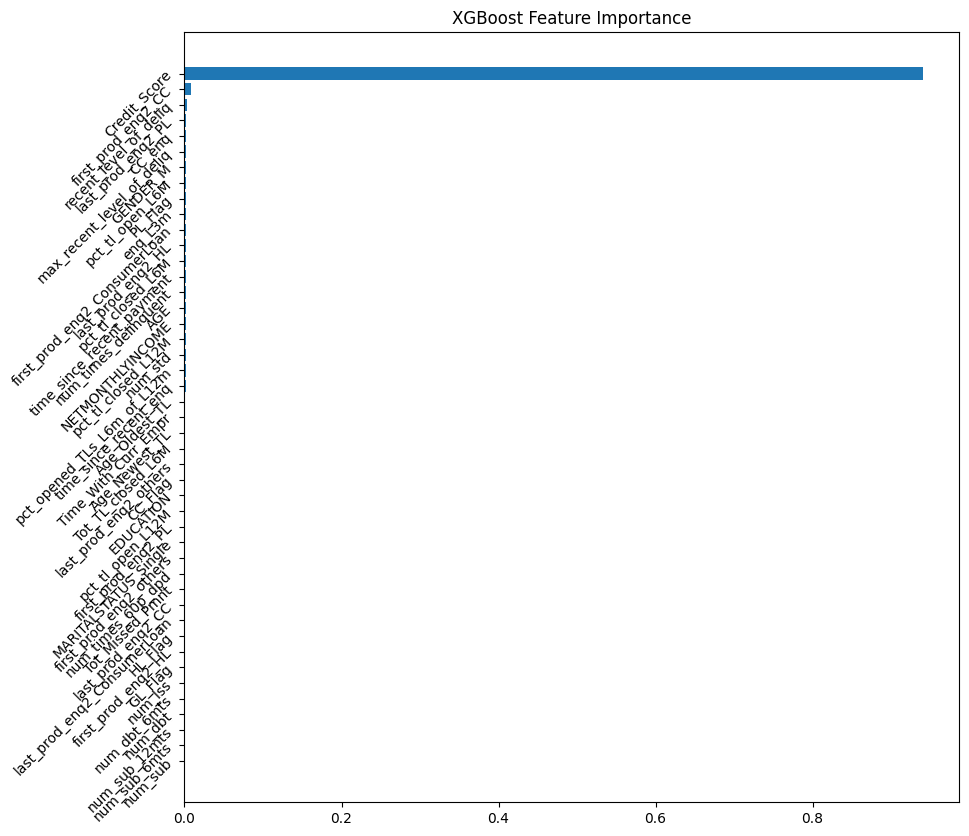

                         Feature  Importance
23                  Credit_Score    0.940107
40            first_prod_enq2_CC    0.008014
11         recent_level_of_deliq    0.002935
38             last_prod_enq2_PL    0.002378
12                        CC_enq    0.002338
2      max_recent_level_of_deliq    0.002272
34                      GENDER_M    0.002101
25               pct_tl_open_L6M    0.001867
20                       PL_Flag    0.001854
14                       enq_L3m    0.001821
41  first_prod_enq2_ConsumerLoan    0.001706
37             last_prod_enq2_HL    0.001704
26             pct_tl_closed_L6M    0.001655
0      time_since_recent_payment    0.001612
1           num_times_delinquent    0.001522
15                           AGE    0.001518
16              NETMONTHLYINCOME    0.001385
28            pct_tl_closed_L12M    0.001377
4                        num_std    0.001363
18    pct_opened_TLs_L6m_of_L12m    0.001362
13         time_since_recent_enq    0.001358
30        

In [ ]:
# check feature importance,it might be possible any variable is dominating the whole data ,if our model is depend only on that
# variable its not that good try to improve other features

import matplotlib.pyplot as plt

# Random Forest Feature Importance
plt.figure(figsize=(10, 10))
rf_feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(rf_feature_importance)
plt.barh(range(len(sorted_idx)), rf_feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx],rotation=45)
plt.title("Random Forest Feature Importance")
plt.show()
#check feature imp in tabular format in percentage
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

# XGBoost Feature Importance
plt.figure(figsize=(10, 10))
xgb_feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(xgb_feature_importance)
plt.barh(range(len(sorted_idx)), xgb_feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx],rotation=45)
plt.title("XGBoost Feature Importance")
plt.show()

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest Metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision (macro):", precision_score(y_test, y_pred_rf, average='macro'))
print("Random Forest Recall (macro):", recall_score(y_test, y_pred_rf, average='macro'))
print("Random Forest F1 Score (macro):", f1_score(y_test, y_pred_rf, average='macro'))

# XGBoost Metrics
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Precision (macro):", precision_score(y_test, y_pred_xgb, average='macro'))
print("XGBoost Recall (macro):", recall_score(y_test, y_pred_xgb, average='macro'))
print("XGBoost F1 Score (macro):", f1_score(y_test, y_pred_xgb, average='macro'))


Random Forest Accuracy: 0.9899201217192849
Random Forest Precision (macro): 0.9825101992187619
Random Forest Recall (macro): 0.9831996279502384
Random Forest F1 Score (macro): 0.9825560974550039
XGBoost Accuracy: 0.9941993153290224
XGBoost Precision (macro): 0.9900846817135593
XGBoost Recall (macro): 0.9887861876525985
XGBoost F1 Score (macro): 0.9893847135259587


In [ ]:
# here we are trying out of validation ,further splitting the test data and checking still
#we getting same accuracy or it changed

from sklearn.model_selection import train_test_split

# Further split the test set into validation and test set
X_val, X_final_test, y_val, y_final_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Evaluate Random Forest on the validation set
y_val_pred_rf = rf_model.predict(X_val)
print("Random Forest Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Random Forest Validation Classification Report:")
print(classification_report(y_val, y_val_pred_rf))

# Evaluate XGBoost on the validation set
y_val_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_val_pred_xgb))
print("XGBoost Validation Classification Report:")
print(classification_report(y_val, y_val_pred_xgb))


Random Forest Validation Accuracy: 0.9895397489539749
Random Forest Validation Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       650
           1       1.00      1.00      1.00      3111
           2       0.99      0.95      0.97       843
           3       1.00      1.00      1.00       654

    accuracy                           0.99      5258
   macro avg       0.98      0.98      0.98      5258
weighted avg       0.99      0.99      0.99      5258

XGBoost Validation Accuracy: 0.9931532902244199
XGBoost Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       650
           1       1.00      1.00      1.00      3111
           2       0.97      0.99      0.98       843
           3       1.00      1.00      1.00       654

    accuracy                           0.99      5258
   macro avg       0.99      0.99      0.99    

In [ ]:
# Remove the dominant feature and check the results
X_train_reduced = X_train.drop(columns=['Credit_Score'])
X_val_reduced = X_val.drop(columns=['Credit_Score'])

# Train models without the dominant feature
rf_model_reduced = RandomForestClassifier(random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)
y_val_pred_rf_reduced = rf_model_reduced.predict(X_val_reduced)

print("Random Forest (without Credit_Score) Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf_reduced))
print("Random Forest (without Credit_Score) Validation Classification Report:")
print(classification_report(y_val, y_val_pred_rf_reduced))

xgb_model_reduced = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_reduced.fit(X_train_reduced, y_train)
y_val_pred_xgb_reduced = xgb_model_reduced.predict(X_val_reduced)

print("XGBoost (without Credit_Score) Validation Accuracy:", accuracy_score(y_val, y_val_pred_xgb_reduced))
print("XGBoost (without Credit_Score) Validation Classification Report:")
print(classification_report(y_val, y_val_pred_xgb_reduced))


Random Forest (without Credit_Score) Validation Accuracy: 0.7459109927729175
Random Forest (without Credit_Score) Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       650
           1       0.77      0.92      0.84      3111
           2       0.44      0.18      0.26       843
           3       0.71      0.71      0.71       654

    accuracy                           0.75      5258
   macro avg       0.68      0.62      0.63      5258
weighted avg       0.71      0.75      0.72      5258

XGBoost (without Credit_Score) Validation Accuracy: 0.7540890072270825
XGBoost (without Credit_Score) Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       650
           1       0.80      0.90      0.85      3111
           2       0.44      0.26      0.33       843
           3       0.70      0.71      0.71       654

    accur

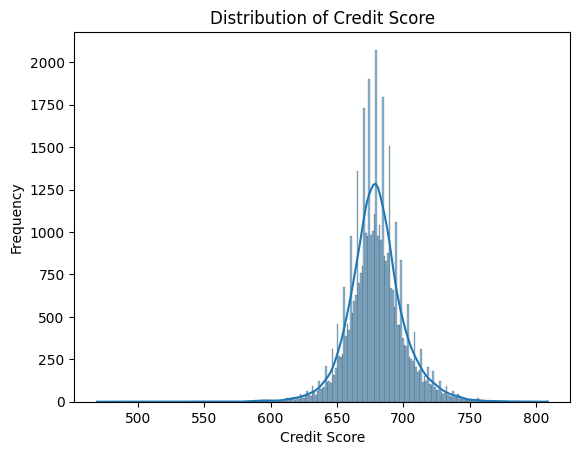

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(X['Credit_Score'], kde=True)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Train Random Forest model with 'credit_score'
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate Accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Calculate AUC-ROC
train_auc_roc_rf = roc_auc_score(y_train, rf_model.predict_proba(X_train), multi_class='ovr')
test_auc_roc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')

# Print Results
print("Random Forest with 'credit_score'")
print(f"Train Accuracy: {train_accuracy_rf}")
print(f"Test Accuracy: {test_accuracy_rf}")
print(f"Train AUC-ROC: {train_auc_roc_rf}")
print(f"Test AUC-ROC: {test_auc_roc_rf}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))


Random Forest with 'credit_score'
Train Accuracy: 1.0
Test Accuracy: 0.9899201217192849
Train AUC-ROC: 1.0
Test AUC-ROC: 0.999743721493543
Confusion Matrix:
 [[1265    5   11    0]
 [   0 6301    0    0]
 [  82    8 1555    0]
 [   0    0    0 1289]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1281
           1       1.00      1.00      1.00      6301
           2       0.99      0.95      0.97      1645
           3       1.00      1.00      1.00      1289

    accuracy                           0.99     10516
   macro avg       0.98      0.98      0.98     10516
weighted avg       0.99      0.99      0.99     10516



In [ ]:
(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

((31548, 45), (31548,), (10516, 45), (10516,))

In [ ]:
# implementing regularisation techniques to reduce dependency on single variable

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

# Define the model with regularization parameters
xgb_model_reg = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
gamma=0.1,
    alpha=1,  # L1 regularization term
    lmbda=1,  # L2 regularization term
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model
xgb_model_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:59:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "lmbda" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, lmbda=1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, ...)

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict probabilities
y_train_proba_reg = xgb_model_reg.predict_proba(X_train)
y_test_proba_reg = xgb_model_reg.predict_proba(X_test)

# Calculate AUC-ROC
train_auc_roc_reg = roc_auc_score(y_train, y_train_proba_reg, multi_class='ovo')
test_auc_roc_reg = roc_auc_score(y_test, y_test_proba_reg, multi_class='ovo')

print(f"Train AUC-ROC with regularization: {train_auc_roc_reg}")
print(f"Test AUC-ROC with regularization: {test_auc_roc_reg}")

Train AUC-ROC with regularization: 0.9999999041675519
Test AUC-ROC with regularization: 0.9997358715605763


In [ ]:
# try Ensemble model

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define base models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Create an ensemble of models
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lr', lr_model)
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict
y_train_pred_ensemble = ensemble_model.predict_proba(X_train)
y_test_pred_ensemble = ensemble_model.predict_proba(X_test)

# Calculate AUC-ROC
train_auc_roc_ensemble = roc_auc_score(y_train, y_train_pred_ensemble,multi_class='ovo')
test_auc_roc_ensemble = roc_auc_score(y_test, y_test_pred_ensemble,multi_class='ovo')

print(f"Train AUC-ROC with ensemble: {train_auc_roc_ensemble}")
print(f"Test AUC-ROC with ensemble: {test_auc_roc_ensemble}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train AUC-ROC with ensemble: 1.0
Test AUC-ROC with ensemble: 0.9996150800728539


We checked the all possible validation techniques , our model genuinely performing well

##**Hyper parameter tuning**


what is hyperparameter tuning?

its a technique to use most perfect parameters from that model can converge the rapidly.

leraning rate : reduces overfitting




In [ ]:
import time
print('program is runnig')
print()
start_time=time.time()

program is runnig



In [ ]:
X=df_encoded.drop(columns=['Approved_Flag','Credit_Score'],axis=1)
y=df_encoded['Approved_Flag']

In [ ]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from operator import index
#hyper parameter tuning

#define parameter gird

param_grid = {
    'n_estimators': [100,150,180,200], #number of base leraners
    'max_depth': [3, 4, 5], #max depth of tree
    'learning_rate': [0.01, 0.1, 0.2,1.0],  #learning rate
    'subsample': [0.8,1.0], #subsample ratio of training instance
    'alpha': [0, 0.1, 0.2], # L1 regularization term
}

index=0

answer_grid={
    'combination':[],
    'n_estimators':[],
    'train_accuracy':[],
    'test_accuracy':[],
    'max_depth':[],
    'learning_rate':[],
    'subsample':[],
    'alpha':[]
}

#loop throught each parameter

for n_estimators in param_grid['n_estimators']:
  for max_depth in param_grid['max_depth']:
    for learning_rate in param_grid['learning_rate']:
      for subsample in param_grid['subsample']:
        for alpha in param_grid['alpha']:
          index+=1

          #define model
          model=xgb.XGBClassifier(objective='multi:softmax',
                                  num_class=4,
                                  n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  learning_rate=learning_rate,
                                  subsample=subsample,
                                  alpha=alpha,
                                  use_label_encoder=False,
                                  eval_metric='logloss',
                                  random_state=42)
          #fit model
          model.fit(X_train,y_train)
          #predict
          y_train_pred=model.predict(X_train)
          y_test_pred=model.predict(X_test)
          #calculate accuracy
          train_accuracy=accuracy_score(y_train,y_train_pred)
          test_accuracy=accuracy_score(y_test,y_test_pred)
          #append to answer
          answer_grid['combination'].append(index)
          answer_grid['n_estimators'].append(n_estimators)
          answer_grid['train_accuracy'].append(train_accuracy)
          answer_grid['test_accuracy'].append(test_accuracy)
          answer_grid['max_depth'].append(max_depth)
          answer_grid['learning_rate'].append(learning_rate)
          answer_grid['subsample'].append(subsample)
          answer_grid['alpha'].append(alpha)
          #save dict in dataset
          answer_grid=pd.DataFrame(answer_grid)

In [ ]:
#save dict in dataset
answer_grid=pd.DataFrame(answer_grid)

In [ ]:
answer_grid.shape

(216, 8)

In [ ]:
answer_grid.to_csv('/content/drive/MyDrive/answer_grid.csv')

In [ ]:
answer_grid.head()

,combination,n_estimators,train_accuracy,test_accuracy,max_depth,learning_rate,subsample,alpha
0,1,100,0.722486,0.715576,3,0.01,0.8,0.0
1,2,100,0.722645,0.715862,3,0.01,0.8,0.1
2,3,100,0.722772,0.716147,3,0.01,0.8,0.2
3,4,100,0.722867,0.715101,3,0.01,1.0,0.0
4,5,100,0.722930,0.714911,3,0.01,1.0,0.1


In [ ]:
#best parametes giving less diff between train and test data

oot=pd.read_excel("/content/drive/MyDrive/Credit_Risk_model_campus_x /Unseen_Dataset.xlsx")

In [ ]:
oot.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,CC_enq_L12m,PL_enq_L12m,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2
0,0.000,0.0,0,0.000,0,0,0,4,1,4,0,72,18,549,29,0,0,11,0,0,0,0,0,0,29,0,0,566,0,51000,114,0,1,0.000,0.0,1,0,Married,12TH,M,PL,PL
1,0.000,0.0,0,0.000,0,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,19000,50,0,0,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan
2,0.125,0.0,0,0.000,1,0,0,0,2,6,0,47,2,302,25,8,0,10,0,0,0,0,0,0,25,0,0,587,0,18,191,0,0,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others
3,0.000,0.0,0,0.000,0,0,0,0,3,0,2,131,32,583,0,0,0,16,0,0,0,0,0,0,0,0,0,3951,0,15000,75,0,0,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL
4,0.000,0.0,1,0.167,0,0,0,0,6,0,0,150,17,245,270,0,11,2,3,0,1,0,0,0,26,1,3,7,4,0,154,0,0,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL


In [ ]:
oot.shape

(100, 42)